# Fake News Classifier

### predict whether the news is fake base on title only

In [125]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv('fake-news/train.csv')
print(df.shape)

(20800, 5)


In [101]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [102]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(df['label'])

1    50.0625
0    49.9375
Name: label, dtype: float64

### Text preprocessing

In [67]:
df=df.dropna()
df.reset_index(inplace=True)
news=df.copy()

In [68]:
news.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


### We decide whether news fake base on Title only

In [70]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review = re.sub('[^a-zA-Z]', ' ', news['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [129]:
len(corpus)

18285

# Applying Countvectorizer()

In [93]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()  # Get the Independent Features

In [109]:
# Parameters of created model
print(cv.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 5000, 'min_df': 1, 'ngram_range': (1, 3), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}


In [108]:
print(cv.get_feature_names()[:10])
print(len(cv.get_feature_names()))  # this are feature for training dataset

['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl', 'abort', 'abroad', 'absolut']
5000


In [97]:
X.shape

(18285, 5000)

In [110]:
## Get the Dependent features
y=news['label']
y.shape

(18285,)

In [101]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [111]:
# Create Training dataset after train_test_split and columns are feature getting from created model
train_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
train_df.shape

(12250, 5000)

In [112]:
train_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [118]:
from sklearn.metrics import accuracy_score
import numpy as np
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

In [114]:
"""
This function prints and plots the confusion matrix.
Normalization can be applied by setting `normalize=True`.
"""
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

accuracy:   0.902
Confusion matrix, without normalization


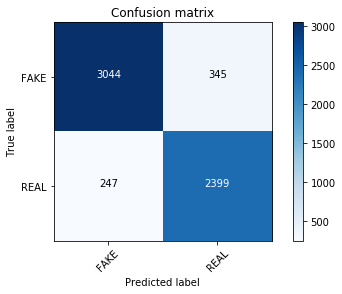

In [117]:
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Passive Aggressive Classifier Algorithm

accuracy:   0.918
Confusion matrix, without normalization


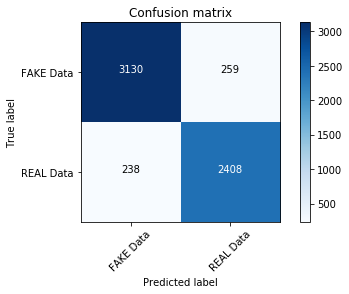

In [121]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [123]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        previous_score=score
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [124]:
classifier.get_params()

{'alpha': 0.2, 'class_prior': None, 'fit_prior': True}

In [125]:
# Get Features names
feature_names = cv.get_feature_names()

In [132]:
classifier.coef_[0]

array([ -9.17145103,  -8.63245453,  -9.17145103, ..., -12.21597347,
        -8.95787693,  -9.44338475])

In [138]:
# first 10 very small value for coef
sorted(classifier.coef_[0])[:10]

[-12.215973470207436,
 -12.215973470207436,
 -12.215973470207436,
 -12.215973470207436,
 -12.215973470207436,
 -12.215973470207436,
 -12.215973470207436,
 -12.215973470207436,
 -12.215973470207436,
 -12.215973470207436]

In [141]:
# last 10 very big value for coef
sorted(classifier.coef_[0])[-10:]

[-5.332510883794344,
 -5.317258935877448,
 -5.307218690892216,
 -5.1939970471352765,
 -5.154639103296999,
 -5.096337832189801,
 -4.819024867586423,
 -4.314596116414821,
 -4.205945941725703,
 -3.9179318088358714]

In [142]:
# Most real
# coef values for very big that word from real news 
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:10]

[(-3.9179318088358714, 'trump'),
 (-4.205945941725703, 'hillari'),
 (-4.314596116414821, 'clinton'),
 (-4.819024867586423, 'elect'),
 (-5.096337832189801, 'new'),
 (-5.154639103296999, 'comment'),
 (-5.1939970471352765, 'video'),
 (-5.307218690892216, 'war'),
 (-5.317258935877448, 'us'),
 (-5.332510883794344, 'hillari clinton')]

In [143]:
# Most fake
# coef values for very small that word from fake news
sorted(zip(classifier.coef_[0], feature_names))[:10]

[(-12.215973470207436, 'abe'),
 (-12.215973470207436, 'abroad'),
 (-12.215973470207436, 'abus new'),
 (-12.215973470207436, 'abus new york'),
 (-12.215973470207436, 'act new'),
 (-12.215973470207436, 'act new york'),
 (-12.215973470207436, 'advic'),
 (-12.215973470207436, 'advis new'),
 (-12.215973470207436, 'advis new york'),
 (-12.215973470207436, 'age new')]

# Applying TfidfVectorizer()

In [131]:
# by using MultinomialNB()
df=pd.read_csv('fake-news/train.csv')
df=df.dropna()
df.reset_index(inplace=True)
news=df.copy()

ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review = re.sub('[^a-zA-Z]', ' ', news['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
# independent features
X=tfidf_v.fit_transform(corpus).toarray()
# Dependent features
y=news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# Get Features names
feature_names = tfidf_v.get_feature_names()
train_df = pd.DataFrame(X_train, columns=feature_names)
# MultinomialNB()
classifier=MultinomialNB(alpha=0.9)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# Most fake
# coef values for very small that word from fake news
sorted(zip(classifier.coef_[0], feature_names))[:10]

accuracy:   0.880


[(-11.186665958111075, 'abe'),
 (-11.186665958111075, 'abroad'),
 (-11.186665958111075, 'abus new'),
 (-11.186665958111075, 'abus new york'),
 (-11.186665958111075, 'act new'),
 (-11.186665958111075, 'act new york'),
 (-11.186665958111075, 'advic'),
 (-11.186665958111075, 'advis new'),
 (-11.186665958111075, 'advis new york'),
 (-11.186665958111075, 'age new')]

In [132]:
# by using PassiveAggressiveClassifier()
df=pd.read_csv('fake-news/train.csv')
df=df.dropna()
df.reset_index(inplace=True)
news=df.copy()

ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review = re.sub('[^a-zA-Z]', ' ', news['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
# independent features
X=tfidf_v.fit_transform(corpus).toarray()
# Dependent features
y=news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# Get Features names
feature_names = tfidf_v.get_feature_names()
train_df = pd.DataFrame(X_train, columns=feature_names)
# by PassiveAggressiveClassifier()
classifier=PassiveAggressiveClassifier(n_iter=50)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# Most fake
# coef values for very small that word from fake news
sorted(zip(classifier.coef_[0], feature_names))[:10]

accuracy:   0.918


[(-36.430785731810545, 'breitbart'),
 (-16.07281602142185, 'new york time'),
 (-16.07281602142185, 'york time'),
 (-12.411772221729834, 'new york'),
 (-12.10188117777379, 'york'),
 (-10.036136415700627, 'hillari clinton'),
 (-8.456043378903862, 'delingpol'),
 (-8.447361079582603, 'shadow'),
 (-8.308422143618326, 'streisand'),
 (-8.201480433498272, 'london')]

# Applying HashingVectorizer() 

In [134]:
# by using MultinomialNB()
df=pd.read_csv('fake-news/train.csv')
df=df.dropna()
df.reset_index(inplace=True)
news=df.copy()

ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review = re.sub('[^a-zA-Z]', ' ', news['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

hs_vectorizer=HashingVectorizer(n_features=5000,non_negative=True)
# independent features
X=hs_vectorizer.fit_transform(corpus).toarray()
# Dependent features
y=news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# Get Features names
# feature_names = hs_vectorizer.get_feature_names()
# train_df = pd.DataFrame(X_train, columns=feature_names)
# MultinomialNB()
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# Most fake
# coef values for very small that word from fake news
sorted(zip(classifier.coef_[0], feature_names))[:10]

accuracy:   0.871


[(-9.853232291923133, 'abe'),
 (-9.853232291923133, 'abedin'),
 (-9.853232291923133, 'access pipelin'),
 (-9.853232291923133, 'accus'),
 (-9.853232291923133, 'acknowledg'),
 (-9.853232291923133, 'acr'),
 (-9.853232291923133, 'across'),
 (-9.853232291923133, 'admin'),
 (-9.853232291923133, 'advic'),
 (-9.853232291923133, 'advisor')]

In [135]:
# by using PassiveAggressiveClassifier()
df=pd.read_csv('fake-news/train.csv')
df=df.dropna()
df.reset_index(inplace=True)
news=df.copy()

ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review = re.sub('[^a-zA-Z]', ' ', news['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

hs_vectorizer=HashingVectorizer(n_features=5000,non_negative=True)
# independent features
X=hs_vectorizer.fit_transform(corpus).toarray()
# Dependent features
y=news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# Get Features names
# feature_names = hs_vectorizer.get_feature_names()
# train_df = pd.DataFrame(X_train, columns=feature_names)
# by PassiveAggressiveClassifier()
classifier=PassiveAggressiveClassifier(n_iter=50)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# Most fake
# coef values for very small that word from fake news
sorted(zip(classifier.coef_[0], feature_names))[:10]

accuracy:   0.899


[(-22.493322492240452, 'husband'),
 (-21.77052085829339, 'brief'),
 (-14.632455108908582, 'repres'),
 (-13.9210610866853, 'plummet'),
 (-11.96886277470831, 'asylum'),
 (-11.493537251520152, 'us presid'),
 (-11.17201628549872, 'milo'),
 (-10.627859398620448, 'stick'),
 (-10.575707965262131, 'possess'),
 (-10.43237477010464, 'visa')]

In [ ]:
# Report on Accuracy
#Applying Countvectorizer()
MultinomialNB(alpha=0.2)  : 0.902
PassiveAggressiveClassifier(n_iter=50) : 0.918
#Applying TfidfVectorizer()
MultinomialNB(alpha=0.9)  : 0.880
PassiveAggressiveClassifier(n_iter=50)  : 0.918
#Applying HashingVectorizer() 
MultinomialNB()  : 0.871
PassiveAggressiveClassifier(n_iter=50)  : 0.918
    
# Final Model :
Countvectorizer()
PassiveAggressiveClassifier(n_iter=50) 

## Final code 

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import numpy as np
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

In [21]:
# by using MultinomialNB()
df=pd.read_csv('fake-news/train.csv')
df=df.dropna()
df.reset_index(inplace=True)
news=df.copy()

ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review = re.sub('[^a-zA-Z]', ' ', news['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
# independent features
X = cv.fit_transform(corpus).toarray()
# Dependent features
y=news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# Get Features names
feature_names = cv.get_feature_names()
train_df = pd.DataFrame(X_train, columns=feature_names)
# MultinomialNB()
classifier=MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# Most fake
# coef values for very small that word from fake news
sorted(zip(classifier.coef_[0], feature_names))[:10]

accuracy:   0.903


[(-12.215973470207436, 'abe'),
 (-12.215973470207436, 'abroad'),
 (-12.215973470207436, 'abus new'),
 (-12.215973470207436, 'abus new york'),
 (-12.215973470207436, 'act new'),
 (-12.215973470207436, 'act new york'),
 (-12.215973470207436, 'advic'),
 (-12.215973470207436, 'advis new'),
 (-12.215973470207436, 'advis new york'),
 (-12.215973470207436, 'age new')]

In [4]:
# by using PassiveAggressiveClassifier()
df=pd.read_csv('fake-news/train.csv')
df=df.dropna()
df.reset_index(inplace=True)
news=df.copy()

ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review = re.sub('[^a-zA-Z]', ' ', news['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
# independent features
X = cv.fit_transform(corpus).toarray()
# Dependent features
y=news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# Get Features names
feature_names = cv.get_feature_names()
train_df = pd.DataFrame(X_train, columns=feature_names)
# by PassiveAggressiveClassifier()
classifier=PassiveAggressiveClassifier(n_iter=50)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
# Most fake
# coef values for very small that word from fake news
sorted(zip(classifier.coef_[0], feature_names))[:10]

accuracy:   0.919


[(-6.5556991342023805, 'breitbart'),
 (-3.668418079594394, 'streisand'),
 (-3.6339890807351387, 'hillari clinton'),
 (-3.554264788595396, 'delingpol'),
 (-3.4679373006291034, 'trump order'),
 (-3.3970065775559406, 'shadow'),
 (-3.3437567003022997, 'snl'),
 (-3.023917781577672, 'new year'),
 (-2.9979336065016167, 'london'),
 (-2.9170506864757906, 'cher')]

In [99]:
# Not useful
from nltk.tokenize import word_tokenize
# Tokenizing the words
data = [corpus[0]]
words = [word_tokenize(x) for x in data][0]
print(words)
print(sorted(zip(classifier.coef_[0], words)))
coefsum=[]
for i in sorted(zip(classifier.coef_[0], words)):
    coefsum.append(i[0])
print('Sum of coef of words :',sum(coefsum))
print('Mean of coef of words :',np.mean(coefsum))

['hous', 'dem', 'aid', 'even', 'see', 'comey', 'letter', 'jason', 'chaffetz', 'tweet']
[(-12.215973470207436, 'chaffetz'), (-12.215973470207436, 'see'), (-9.443384747967656, 'letter'), (-9.171451032484013, 'aid'), (-9.171451032484013, 'even'), (-9.171451032484013, 'hous'), (-9.171451032484013, 'jason'), (-8.78198626572229, 'tweet'), (-8.632454531751327, 'dem'), (-7.705113963690586, 'comey')]
Sum of coef of words : -95.68069057948279
Mean of coef of words : -9.568069057948279


## Predict for single News 

In [112]:
print(corpus[0])
data = corpus[0]
cps = cv.transform([data]).toarray()
my_prediction = classifier.predict(cps)
pred = my_prediction.tolist()
print('label :',pred[0])
if pred[0]==1:
    print('Fake News')
else:
    print('True News')

hous dem aid even see comey letter jason chaffetz tweet
label : 1
Fake News


In [123]:
def prework(news):
    ps = PorterStemmer()
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    return corpus

row_news_title = df.loc[3,'title']
print(row_news_title)
data = prework(row_news_title)  
print(data)
cps = cv.transform(data).toarray()
my_prediction = classifier.predict(cps)
pred = my_prediction.tolist()
print('label :',pred[0])
if pred[0]==1:
    print('Fake News.................!')
else:
    print('True News.................!')

15 Civilians Killed In Single US Airstrike Have Been Identified
['civilian kill singl us airstrik identifi']
label : 1
Fake News.................!


In [124]:
def prework(news):
    ps = PorterStemmer()
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', news)
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    return corpus

row_news_title = df.loc[1,'title']
print(row_news_title)
data = prework(row_news_title)  
print(data)
cps = cv.transform(data).toarray()
my_prediction = classifier.predict(cps)
pred = my_prediction.tolist()
print('label :',pred[0])
if pred[0]==1:
    print('Fake News.................!')
else:
    print('True News.................!')

FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart
['flynn hillari clinton big woman campu breitbart']
label : 0
True News.................!
